In [2]:
import numpy as np
from scipy.linalg import norm
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Prob 1

In [3]:
def k_neighborhood(data,x,k):
    sort = data[np.argsort(norm(data-x,axis=1))]
    return sort[:k]

## Prob 2

In [4]:
def knn_label(data,labels,x,k):
    classes = np.unique(labels)
    sort = data[np.argsort(norm(data-x,axis=1))][:k]
    votes = np.array([np.sum(labels[sort] == c) for c in classes])
    return classes[votes.argmax()]

## Prob 3

In [5]:
class KNN:
    def __init__(self,train,trainLabels):
        self.classes = np.unique(trainLabels)
        self.train = train
        self.trainLabels = trainLabels
    def classify(self,test,k):
        testLabels = np.empty(test.shape[0])
        for i,t in enumerate(test):
            sort = np.argsort(norm(self.train-t,axis=1))[:k]
            votes = np.array([np.sum(self.trainLabels[sort] == c) 
                              for c in self.classes])
            #import pdb;pdb.set_trace()
            testLabels[i] = self.classes[votes.argmax()]
            
        return testLabels


In [6]:
data = load_iris()["data"]
labels = load_iris()["target"]

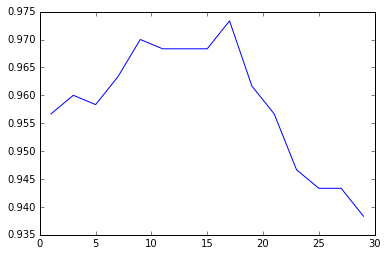

In [7]:
ks = np.arange(1,30,2)
accuracies = np.zeros(ks.size)

for j in xrange(20):
    sort = np.argsort(np.random.rand(data.shape[0]))
    data1 = data[sort]
    labels1 = labels[sort]
    
    train = data1[:int(data.shape[0]*.8)]
    trainLabels = labels1[:int(data.shape[0]*.8)]
    test = data1[int(data.shape[0]*.8):]
    testLabels = labels1[int(data.shape[0]*.8):]
    
    for i,k in enumerate(ks):
        knn = KNN(train,trainLabels)
        labs = knn.classify(test,k)
        accuracies[i] += np.sum(labs == testLabels)/(testLabels.size*1.)
plt.plot(ks,accuracies/20.)
plt.show()

## Prob 4

In [8]:
import cvxopt
import numpy as np
from scipy.linalg import norm
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as la
cvxopt.solvers.options['show_progress']=False
class SVM:
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
        self.k = None
        
    def setKernel(self,kernelType,a=0,d=1,gamma=1.0,r=0):
        if kernelType == 0:
            self.k = lambda x,y: (x.T.dot(y)+a)**d
        elif kernelType == 1:
            self.k = lambda x,y:np.exp(-gamma*la.norm(x-y)**2.)
        else:
            self.k = lambda x,y: np.tanh(x.T.dot(y) + r)

    def train(self):
        n_samples = self.X.shape[0]
        K = np.zeros((n_samples,n_samples))
        for i in xrange(n_samples):
            for j in xrange(n_samples):
                K[i,j] = self.k(self.X[i,:], self.X[j,:])
        Q = cvxopt.matrix(np.outer(self.Y, self.Y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(self.Y, (1, n_samples),tc='d')
        b = cvxopt.matrix(0.0)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        h = cvxopt.matrix(np.zeros(n_samples))
        cvxopt.solvers.options['show_progess']=False
        solution = cvxopt.solvers.qp(Q, q, G, h, A, b)
                                     
        self.a = np.ravel(solution['x'])
    def classify(self,x):
        f = 0
        n_samples = self.X.shape[0]
        K = np.zeros((n_samples,n_samples))
        for i in xrange(n_samples):
            f += self.a[i]*self.Y[i]*self.k(x,self.X[i,:])
        return np.sign(f)

## Prob 5

In [9]:
data = pd.read_csv("cancer.csv")
data["bare-nuclei"] = pd.to_numeric(data["bare-nuclei"],errors='coerce')
data= data.dropna()

allX = data[data.columns[1:-1]]
allY = data["cancerous"]

num = int(len(allY)*.8)

trainX = data[data.columns[1:-1]][:num]
trainY = data["cancerous"][:num]

testX = data[data.columns[1:-1]][num:]
testY = data["cancerous"][num:]

### Polynomial
Did ok, but not great

In [10]:
As = np.linspace(-5,5,10)
ds = np.linspace(-5,5,10)
accuracies = np.empty((10,10))
for i,a in enumerate(As):
    for j,d in enumerate(ds):
        try:
            svm = SVM(trainX.values,trainY.values)
            svm.setKernel(0,a=a,d=d)
            svm.train()

            labs = testX.apply(svm.classify,axis=1)

            labs.to_frame()
            lv = labs.values
            tv = testY.values.reshape(lv.shape[0])
            accuracies[i,j] = (tv == lv).sum()/(1.*len(tv))
        except:
            accuracies[i,j] = 0
        #print accuracies[i,j]

Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (si

In [11]:
best = np.argmax(accuracies)
print "a= ",As[best//10], " d= ",ds[best%10]
print accuracies[best//10,best%10]

a=  -2.77777777778  d=  -5.0
0.759124087591


### Radial Basis Function
This performed awesomely

In [12]:
gammas = np.linspace(-5,5,10)
accuracies = np.empty(10)
for i,gamma in enumerate(gammas):
    try:
        svm = SVM(trainX.values,trainY.values)
        svm.setKernel(1,gamma=gamma)
        svm.train()

        labs = testX.apply(svm.classify,axis=1)

        labs.to_frame()
        lv = labs.values
        tv = testY.values.reshape(lv.shape[0])
        accuracies[i] = (tv == lv).sum()/(1.*len(tv))
    except Exception as e:
        accuracies[i] = 0
best = np.argmax(accuracies)
print "gamma= ",gammas[best]
print accuracies[best]

gamma=  0.555555555556
0.992700729927


### Sigmoid
This one didn't work that well

In [13]:
rs = np.linspace(-5,5,10)
accuracies = np.empty(10)
for i,r in enumerate(rs):
    try:
        svm = SVM(trainX.values,trainY.values)
        svm.setKernel(2,r=r)
        svm.train()

        labs = testX.apply(svm.classify,axis=1)

        labs.to_frame()
        lv = labs.values
        tv = testY.values.reshape(lv.shape[0])
        accuracies[i] = (tv == lv).sum()/(1.*len(tv))
    except Exception as e:
        accuracies[i] = 0
best = np.argmax(accuracies)
print "r= ",rs[best]
print accuracies[best]

Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
Terminated (singular KKT matrix).
r=  3.88888888889
0.510948905109
